In [1]:
%matplotlib inline
"""
Define a suite a tests for the deviation calculations.
"""
import pandas as pd
import numpy as np
import os

import pylab as plt

# Some globals.
DNAME = "../data/Well_Surveys_Projected_to_TD.csv"


def nrmse(measured, actual):
    
    range = np.max(actual) - np.min(actual)
    if range == 0:
        return 0
    else:
        return np.sqrt(((measured - actual) ** 2).mean())/(np.max(actual) - np.min(actual))


def compare_curve(new_curve, true_curve):

    return nrmse(new_curve, true_curve)


def tan_method(md, inc, azi):
    
    azi_r = np.deg2rad(azi)
    inc_r = np.deg2rad(inc)

    northing = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.cos(azi_r[1:]))
    northing = np.insert(northing, 0, 0)

    easting = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.sin(azi_r[1:]))
    easting = np.insert(easting, 0, 0)
    
    tvd = np.cumsum((md[1:] - md[:-1]) * np.cos(inc_r[1:]))
    tvd = np.insert(tvd, 0, 0)

    return tvd, northing, easting


      1: North = SUM ((MD2 - MD1) * Sin WD2 * Cos HAZ2)
      2: East = SUM ((MD2 - MD1) * Sin WD2 * Sin HAZ2)
      3: TVD = SUM ((MD2 - MD1) * Cos WD2)

In [3]:
true_df = pd.read_csv(
    DNAME, header=4, skipfooter=3, index_col=False, engine="python"
).dropna(axis=1)

# true_data = {'MD[m]': [0, 10, 20, 30, 40],
#              'Inc[deg]': [0, 10, 10, 10, 10],
#              'Azi[deg]': [0, 0, 0, 0, 0],
#              'North[m]': [0.0, 1.7, 3.5, 5.2, 6.9],
#              'East[m]': [0.0, 0.0, 0.0, 0.0, 0.0],
#              'TVD[m]': [0.0, 9.8, 19.7, 29.5, 39.4]}

# true_df = pd.DataFrame(true_data)

md = true_df["MD[m]"].values
inc = true_df["Inc[deg]"].values
azi = true_df["Azi[deg]"].values

true_northing = true_df['North[m]']
true_easting = true_df['East[m]']
true_tvd = true_df['TVD[m]']

tvd, northing, easting = tan_method(md, inc, azi)

print('TVD Error: ', compare_curve(tvd, true_tvd))
print("North Error: ", compare_curve(northing, true_northing))
print('East Error: ', compare_curve(easting, true_easting))

assert np.allclose(tvd, true_tvd, rtol=1e-2)

TVD Error:  0.0009505039047772022
North Error:  0.0075322764849597565
East Error:  0.007037923449220978


In [4]:
#interpolate tvd, inc, azi, northing, & easting parameters at 100 ft intervals with respect to md

md100 = np.asarray(range(0,int(md[-1]), 100)) 

tvd100 = np.interp(md100, md, tvd)
inc100 = np.interp(md100, md, inc)
azi100 = np.interp(md100, md, azi)
northing100 = np.interp(md100, md, northing)
easting100 = np.interp(md100, md, easting)

print('\n md100: \n', md100)
print('\n tvd100: \n', tvd100)
print('\n inc100: \n', inc100)
print('\n azi100: \n', azi100)
print('\n northing100: \n', northing100)
print('\n easting100: \n', easting100)


 md100: 
 [   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200]

 tvd100: 
 [   0.           99.98766325  199.96165017  299.40303687  397.34918638
  493.72638554  586.23424199  673.98616466  760.25882983  846.82696924
  933.46764193 1020.0338059  1106.37488828 1192.92447079 1279.8677798
 1366.81982774 1454.25629323 1540.44854241 1625.09782353 1710.3059897
 1793.97495715 1875.06801838 1956.08735333]

 inc100: 
 [ 0.          0.9         1.69072848  7.9217629  13.56170213 16.62951699
 24.7862069  30.97773852 30.01443662 30.3        29.80355999 30.04646703
 30.49580634 29.85310773 29.41338941 29.38008186 28.6        31.56004228
 32.         31.46716765 34.57282533 35.84832307 35.99555401]

 azi100: 
 [  0.          15.64518703   4.22582781 344.63779638 338.97085106
 299.88570662 298.57068966 304.56844523 304.14739437 302.04106862
 299.49889996 299.67351279 297.69559154 298.54310773 298.39
 299.71510232 300.69796429 302.19   

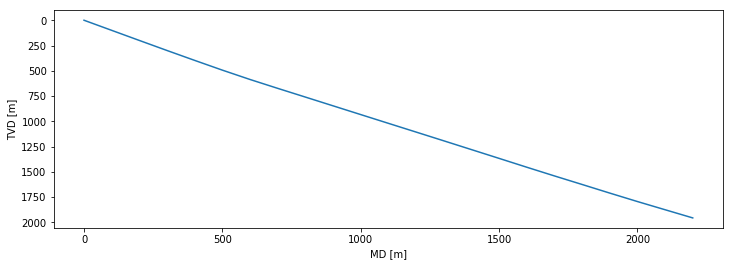

In [4]:
fig = plt.figure(figsize=(12,4))
plt.plot(md100, tvd100)

plt.gca().invert_yaxis()

plt.xlabel('MD [m]')
plt.ylabel('TVD [m]')
plt.show()

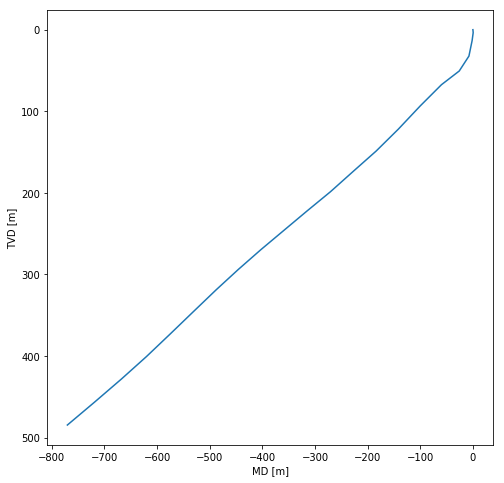

In [5]:
fig = plt.figure(figsize=(8,8))
plt.plot(easting100, northing100)

plt.gca().invert_yaxis()

plt.xlabel('MD [m]')
plt.ylabel('TVD [m]')
plt.show()

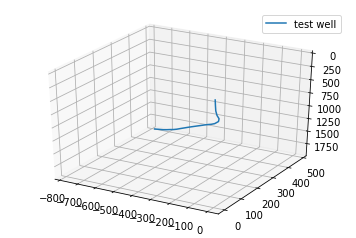

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(easting100, northing100, tvd100, label='test well')
ax.invert_zaxis()
ax.legend()
